<a href="https://colab.research.google.com/github/ianlim28/Data_ToolBox/blob/master/network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
T = pd.read_pickle('ego-twitter.p')

In [7]:
# number of nodes
print(len(T.nodes()))

print(type(T.nodes()))

# number of edges
print(len(T.edges()))



23369
<class 'networkx.classes.reportviews.NodeView'>
33142


## Querying a graph

In [14]:
import datetime
# Use a list comprehension to get the nodes of interest: noi, Nodes of interest
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']
print(len(noi))
# Use a list comprehension to get the edges of interest: eoi, edges of interest
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < datetime.date(2010,1,1)]

print(len(eoi))

7833
12387


In [15]:
type(T)

networkx.classes.digraph.DiGraph

# Altering nodes

In [16]:
T.edges[1,10]

{'date': datetime.date(2012, 9, 8)}

In [20]:
T.edges[1,10]['weight'] = 2
#u,v are node1 and node2
for u,v,d in T.edges(data=True):
    if 293 in [u,v]:
        T.edges[u,v]['weight'] = 1.1
    

In [22]:
# Checking whether there are self-loops in the graph
def find_selfloop_nodes(G):
    nodes_in_selfloops=[]

    for u, v in G.edges():
        if u == v:
            nodes_in_selfloops.append(u)
    return nodes_in_selfloops

find_selfloop_nodes(T)

[535,
 644,
 1007,
 1802,
 2038,
 2313,
 2498,
 2950,
 3436,
 4572,
 5952,
 6739,
 7077,
 7323,
 7394,
 7693,
 8477,
 9680,
 10315,
 10356,
 11078,
 11327,
 11942,
 14436,
 15162,
 15548,
 15620,
 16310,
 16434,
 16494,
 17128,
 17429,
 17754,
 18186,
 18421,
 19416,
 20784,
 20807,
 21313,
 22103,
 22208,
 22465]

In [34]:
!pip install nxviz

     |████████████████████████████████| 1.8MB 4.0MB/s 
     |████████████████████████████████| 266kB 21.5MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 20.4MB 1.3MB/s 
     |████████████████████████████████| 276kB 41.0MB/s 
     |████████████████████████████████| 13.1MB 36.7MB/s 
     |████████████████████████████████| 81kB 9.1MB/s 
     |████████████████████████████████| 2.3MB 42.9MB/s 
     |████████████████████████████████| 10.5MB 191kB/s 
     |████████████████████████████████| 225kB 43.4MB/s 
     |████████████████████████████████| 583kB 40.7MB/s 
     |████████████████████████████████| 215kB 40.5MB/s 
     |████████████████████████████████| 112kB 44.5MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556409 sha256=d4727d025699818be330e327258b77b00947cd7a60d05d9e03ffada49aa54f12
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
  Created w

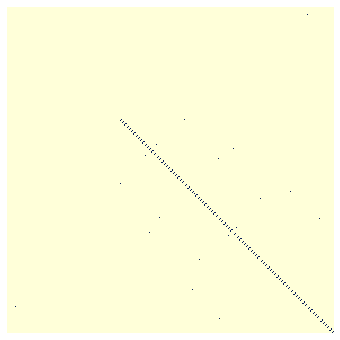

In [36]:
import random
sampled_nodes = random.sample(T.nodes, 100)
sampled_edges = random.sample(T.edges, 100)
G = nx.Graph()

G.add_nodes_from(sampled_nodes)
G.add_edges_from(sampled_edges)
import nxviz as nv
m = nv.MatrixPlot(G)
m.draw()
plt.show()

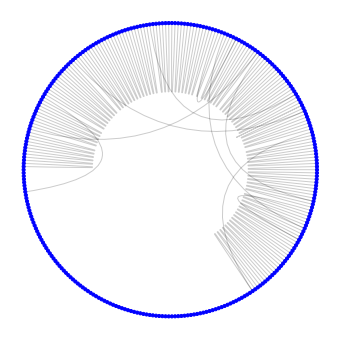

In [38]:
from nxviz import CircosPlot

# Create the CircosPlot object: c
c = CircosPlot(G)

# Draw c to the screen
c.draw()

# Display the plot
plt.show()


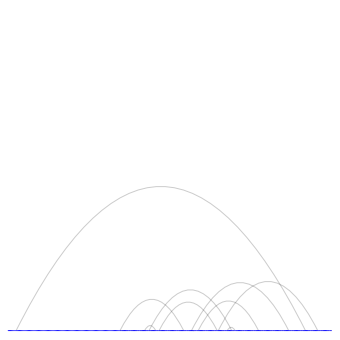

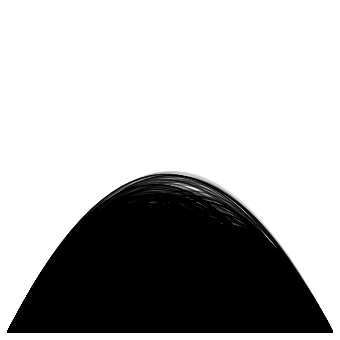

In [39]:
from nxviz import ArcPlot

# Create the un-customized ArcPlot object: a
a = ArcPlot(G)

# Draw a to the screen
a.draw()

# Display the plot
plt.show()

# Create the customized ArcPlot object: a2
a2 = ArcPlot(T, node_order='category',node_color='category')

# Draw a2 to the screen
a2.draw()

# Display the plot
plt.show()


## Degree centrality